In [98]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
PRICE_PATH = 'BTC-USD.csv'
SENTIMENT_PATH = 'btc_reddit_sentiment_3.csv'

In [126]:
btc_price_df = pd.read_csv(os.path.abspath('data/{}'.format(PRICE_PATH)))
btc_price_df.columns = btc_price_df.columns.str.lower()
btc_price_df.date = pd.to_datetime(btc_price_df.date).dt.date

In [127]:
btc_sent_df = pd.read_csv(os.path.abspath('data/results/{}'.format(SENTIMENT_PATH)), encoding='utf-8', sep=';')

In [128]:
btc_sent_df.date = pd.to_datetime(btc_sent_df.date).dt.date

In [129]:
daily_sentiment = btc_sent_df.groupby('date')['sentiment'].mean()
daily_sentiment = pd.DataFrame({'date': daily_sentiment.index, 'sentiment': daily_sentiment.values})

In [130]:
daily_sentiment.head()

,date,sentiment
0,2021-01-01,0.236842
1,2021-01-02,0.131579
2,2021-01-03,0.221591
3,2021-01-04,0.090395
4,2021-01-05,0.262570


In [131]:
merged_price_sent = pd.merge(btc_price_df, daily_sentiment, on='date', how='inner')

In [132]:
merged_price_sent.head(15)

,date,open,high,low,close,adj close,volume,sentiment
0,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,0.236842
1,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,0.131579
2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,0.221591
3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344,0.090395
4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,0.262570
5,2021-01-06,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811,0.206030
6,2021-01-07,36833.875000,40180.367188,36491.191406,39371.042969,39371.042969,84762141031,0.245000
7,2021-01-08,39381.765625,41946.738281,36838.636719,40797.609375,40797.609375,88107519480,0.236181
8,2021-01-09,40788.640625,41436.351563,38980.875000,40254.546875,40254.546875,61984162837,0.261307
9,2021-01-10,40254.218750,41420.191406,35984.628906,38356.441406,38356.441406,79980747690,0.169231


In [133]:
def convert_to_multiday(df, days=7):
    df['change'] = 0.0
    df['change_pct'] = 0.0

    for index, row in df.iterrows():
        if len(df) > index + days:
            df.loc[index, 'change'] = (df.loc[index + days, 'close'] - row['open'])
            df.loc[index, 'change_pct'] = change_pct = (df.loc[index + days, 'close'] - row['open']) / row['open']
            df.loc[index, 'sentiment'] = df.loc[index:index + days, 'sentiment'].mean()
            df.loc[index, 'increased'] = 1 if change_pct > 0 else 0
    
    df = df[::days]
    
    df['close'] = df['close'].shift(-1)
    df['change'] = df['change'].shift(-1)
    df['change_pct'] = df['change_pct'].shift(-1)

    return df

In [134]:
weekly_price_sent = convert_to_multiday(merged_price_sent, days=7)

/var/folders/hw/8skdg8jd63946x0yqr3hmqcw0000gn/T/ipykernel_2422/928969914.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['close'] = df['close'].shift(-1)
/var/folders/hw/8skdg8jd63946x0yqr3hmqcw0000gn/T/ipykernel_2422/928969914.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change'] = df['change'].shift(-1)
/var/folders/hw/8skdg8jd63946x0yqr3hmqcw0000gn/T/ipykernel_2422/928969914.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [135]:
df.head()

,date,open,high,low,close,adj close,volume,sentiment,change,change_pct,increased
0,2021-01-01,28994.009766,29600.626953,28803.585938,40797.609375,29374.152344,40730301359,0.208448,-2556.398437,-0.064913,1.0
7,2021-01-08,39381.765625,41946.738281,36838.636719,36825.367188,40797.609375,88107519480,0.206278,-6150.945312,-0.157085,0.0
14,2021-01-15,39156.707031,39577.710938,34659.589844,33005.761719,36825.367188,67760757881,0.190186,3498.761719,0.113531,0.0
21,2021-01-22,30817.625000,33811.851563,28953.373047,34316.386719,33005.761719,77207272511,0.182312,4584.769531,0.133594,1.0
28,2021-01-29,34318.671875,38406.261719,32064.814453,38903.441406,34316.386719,117894572511,0.224965,9467.097657,0.241199,1.0


In [164]:
df = merged_price_sent
# df = weekly_price_sent

In [165]:
df.head()

,date,open,high,low,close,adj close,volume,sentiment,change,change_pct,increased
0,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,0.203774,11803.599609,0.407105,1.0
1,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,0.206832,10878.091797,0.370300,1.0
2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,0.211538,6227.033203,0.193811,1.0
3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344,0.202456,2755.707031,0.083987,1.0
4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,0.224907,1945.919922,0.060854,1.0


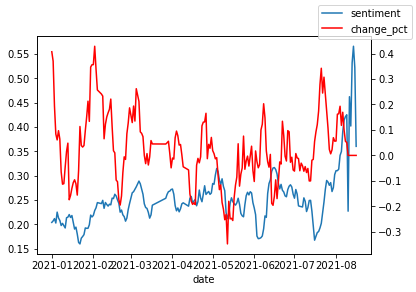

In [166]:
ax = df.plot(x="date", y="sentiment", legend=False)
ax2 = ax.twinx()
df.plot(x="date", y="change_pct", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

# sns.lineplot(x="date", y="sentiment", hue="close", data=merged_price_sent)

In [163]:
df.corr(method='pearson')

,open,high,low,close,adj close,volume,sentiment,change,change_pct,increased
open,1.000000,0.993813,0.982994,0.786657,0.985714,0.262523,0.248495,-0.339882,-0.355086,-0.197100
high,0.993813,1.000000,0.981376,0.773646,0.991228,0.306026,0.222584,-0.341366,-0.356259,-0.182485
low,0.982994,0.981376,1.000000,0.814816,0.992961,0.159835,0.267852,-0.386757,-0.398274,-0.126777
close,0.786657,0.773646,0.814816,1.000000,0.797514,0.145223,0.271865,-0.314717,-0.320379,0.312475
adj close,0.985714,0.991228,0.992961,0.797514,1.000000,0.226155,0.240657,-0.379206,-0.393901,-0.142513
volume,0.262523,0.306026,0.159835,0.145223,0.226155,1.000000,-0.335822,0.075965,0.070769,-0.236021
sentiment,0.248495,0.222584,0.267852,0.271865,0.240657,-0.335822,1.000000,-0.166529,-0.201774,0.115069
change,-0.339882,-0.341366,-0.386757,-0.314717,-0.379206,0.075965,-0.166529,1.000000,0.984335,-0.007323
change_pct,-0.355086,-0.356259,-0.398274,-0.320379,-0.393901,0.070769,-0.201774,0.984335,1.000000,0.024752
increased,-0.197100,-0.182485,-0.126777,0.312475,-0.142513,-0.236021,0.115069,-0.007323,0.024752,1.000000
